In [10]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
train_dataset = MNIST('data', train=True, download=True,
        transform=transforms.Compose([
            transforms.ToTensor()
        ]))

In [7]:
class SubDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):        
        return self.data[idx], self.targets[idx]

In [14]:
def permute_images(images):
    n = images.shape[0]
    size = images[0].size()

    image_flatten = torch.flatten(images, start_dim=1, end_dim=2)
    image_flatten_permuted = torch.index_select(image_flatten, dim=1, index=torch.randperm(image_flatten.size(1)))
    image_permuted = torch.nn.Unflatten(1, size)(image_flatten_permuted)
    
    return image_permuted

def make_subdatasets(dataset, size, permute_data=True):
    data = dataset.data
    targets = dataset.targets

    shuffled_indices = torch.randperm(len(targets))[:size]
    subdata = data[shuffled_indices]
    subtargets = targets[shuffled_indices]
    permuted_subdata = permute_images(subdata) if permute_data else subdata
    permuted_subdata = permuted_subdata.reshape(-1, 1, permuted_subdata.shape[-2], permuted_subdata.shape[-1]) # dim(permuted_subdata) = (channel, height, width)

    return SubDataset(permuted_subdata, subtargets)

In [19]:
permuted_MNIST_subdatasets = []
n_task = 10
subdataset_size = 100

for _ in range(n_task):
    subdataset = make_subdatasets(train_dataset, subdataset_size, permute_data=False)
    permuted_MNIST_subdatasets.append(subdataset)

In [20]:
def print_images(images):
    row = 1
    col = images.shape[0]
    plt.figure(figsize=(col, col))

    for i, image in enumerate(images):
        plt.subplot(row, col, i+1)
        plt.imshow(image[0,:,:], cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

length of series of subset: 10
Data size of the subdataset: 100

tensor([8, 9, 8, 0, 8, 9, 6, 6, 7, 2])


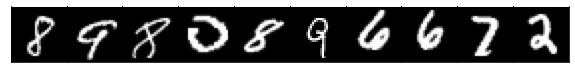

tensor([3, 5, 6, 3, 9, 6, 5, 2, 9, 5])


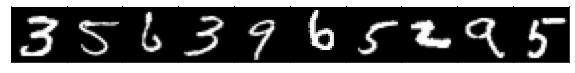

tensor([7, 6, 9, 3, 8, 1, 0, 8, 3, 0])


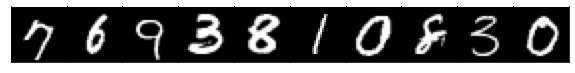

tensor([3, 9, 6, 6, 6, 9, 6, 3, 9, 7])


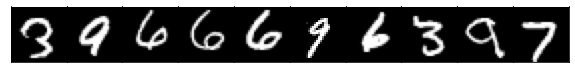

tensor([8, 3, 3, 9, 2, 3, 0, 4, 0, 2])


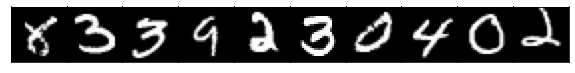

In [21]:
print("length of series of subset: {}".format(len(permuted_MNIST_subdatasets)))
print("Data size of the subdataset: {}".format(len(permuted_MNIST_subdatasets[0].targets)))
print()

for i in range(5):
    images = permuted_MNIST_subdatasets[i].data[:10]
    lables = permuted_MNIST_subdatasets[i].targets[:10]
    print(lables)
    print_images(images)
    

In [22]:
for i, subdataset in enumerate(permuted_MNIST_subdatasets):

    data_loader = DataLoader(subdataset, batch_size=32, shuffle=True, drop_last=True)

    for x, y in data_loader:
        print(y)
        break

tensor([7, 5, 7, 7, 1, 0, 3, 8, 1, 2, 2, 3, 1, 3, 4, 3, 6, 7, 9, 3, 8, 3, 1, 4,
        7, 7, 7, 4, 3, 1, 6, 0])
tensor([9, 4, 0, 1, 3, 2, 3, 7, 5, 5, 9, 9, 6, 0, 2, 1, 9, 9, 5, 9, 6, 6, 0, 0,
        9, 5, 7, 9, 0, 5, 9, 6])
tensor([7, 9, 5, 4, 5, 2, 3, 5, 7, 2, 0, 2, 9, 1, 4, 8, 2, 3, 5, 0, 6, 5, 6, 0,
        7, 4, 4, 7, 0, 8, 2, 1])
tensor([0, 5, 1, 5, 8, 2, 3, 2, 8, 3, 3, 0, 6, 9, 4, 2, 7, 1, 6, 7, 9, 0, 3, 4,
        7, 3, 4, 0, 3, 2, 4, 3])
tensor([8, 4, 2, 5, 2, 9, 8, 7, 7, 2, 2, 3, 0, 6, 2, 8, 2, 7, 9, 3, 4, 9, 5, 8,
        6, 6, 0, 2, 3, 1, 5, 9])
tensor([0, 3, 7, 7, 8, 1, 7, 6, 6, 1, 7, 6, 0, 3, 7, 4, 8, 9, 7, 7, 7, 3, 8, 2,
        9, 0, 5, 1, 7, 6, 4, 5])
tensor([0, 9, 6, 9, 9, 4, 5, 1, 6, 8, 1, 6, 5, 1, 2, 2, 4, 9, 6, 9, 2, 8, 3, 4,
        7, 2, 5, 9, 2, 1, 8, 2])
tensor([8, 8, 8, 3, 6, 0, 2, 4, 8, 9, 8, 1, 2, 0, 6, 4, 7, 9, 1, 7, 8, 9, 7, 9,
        9, 8, 9, 5, 3, 9, 2, 8])
tensor([1, 1, 4, 0, 5, 8, 0, 2, 5, 4, 0, 1, 8, 9, 9, 7, 1, 4, 0, 9, 9, 8, 3, 7,
        4, 3, 9,